# Get Immutable Reference Benchmarks

In [1]:
# select measurement file
file_name = "../output/2024-12-29 12-21-06 get4.json"

# plot settings
show_error_bar = False
unit = "ms"
plotted_object_sizes = [32, 128, 512, 1024]

In [2]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [3]:
from util.convert import convert_datasets
import pandas as pd

ovpm = convert_datasets(
    raw_data,
    "vNV-Heap",
    [("get_min", "Best-Case"), ("get_min_max", "Bad-Case"), ("get_max", "Worst-Case")],
    ["mean", "min", "max", "options.object_size", "options.blocker_size", "options.blocker_count", "options.modules", "machine_name", "cold_start", "repetitions"],
    unwrapped=show_error_bar
)

baseline = convert_datasets(
    raw_data,
    "Baseline",
    [("baseline_get_min", "Best-Case"), ("baseline_get_min_max", "Bad-Case"), ("baseline_get_max", "Worst-Case")],
    ["mean", "min", "max", "options.object_size", "options.bucket_size", "options.modules", "machine_name", "cold_start", "repetitions"],
    unwrapped=show_error_bar
)

dataset = pd.concat([ovpm, baseline])
dataset.head()

,mean,min,max,options.object_size,options.blocker_size,options.blocker_count,options.modules,machine_name,cold_start,repetitions,ticks_per_ms,dataset_type,benchmark_title,benchmark_id,options.bucket_size
0,988.3,982,1045,8,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,vNV-Heap,Best-Case,get_min,NaN
1,811.0,811,811,16,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,vNV-Heap,Best-Case,get_min,NaN
2,862.1,855,919,32,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,vNV-Heap,Best-Case,get_min,NaN
3,858.4,855,887,48,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,vNV-Heap,Best-Case,get_min,NaN
4,925.7,919,982,64,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,vNV-Heap,Best-Case,get_min,NaN


## Display Min and Max Latencies

In [4]:
from util.convert import display_dataset_infos

display_dataset_infos(dataset)

min    27.75000
max    61.79375
Name: mean, dtype: float64

min      550.2500
max    12371.0125
Name: mean, dtype: float64

min    20645.13125
max    32656.81250
Name: mean, dtype: float64

## Compare the latencies

In [5]:
from util.convert import scale_and_filter_data
from IPython.display import HTML, display
import numpy as np

filtered = scale_and_filter_data(dataset, unit, plotted_object_sizes)

for title in filtered["benchmark_title"].unique():
    display(HTML(f"<b>{title}</b>"))
        
    tmp = filtered[filtered["benchmark_title"] == title]
    assert(len(tmp["benchmark_id"].unique()) == 2)
    [left, right] = tmp["benchmark_id"].unique()

    res = []
    for size in tmp["options.object_size"].unique():
        rows = tmp[(tmp["options.object_size"] == size)]
        a = rows[rows["benchmark_id"] == left]["mean"].iloc[0]
        b = rows[rows["benchmark_id"] == right]["mean"].iloc[0]
        res.append((size, a,b,(100 * a)/b - 100, (100 * b)/a - 100))

    d = pd.DataFrame(res, columns=["Object size", f"{left} [{unit}]", f"{right} [{unit}]", "% Worse", "% Better"])

    display(d)
    print("Stats:")
    display(d.describe())

,Object size,get_min [ms],baseline_get_min [ms],% Worse,% Better
0,32,0.053881,0.027794,93.861030,-48.416657
1,128,0.057681,0.027800,107.486511,-51.804096
2,512,0.053437,0.027806,92.178018,-47.964912
3,1024,0.053756,0.027800,93.367806,-48.285083


Stats:


,Object size,get_min [ms],baseline_get_min [ms],% Worse,% Better
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,424.000000,0.054689,0.027800,96.723341,-49.117687
std,450.564091,0.002004,0.000005,7.210137,1.800958
min,32.000000,0.053437,0.027794,92.178018,-51.804096
25%,104.000000,0.053677,0.027798,93.070359,-49.263517
50%,320.000000,0.053819,0.027800,93.614418,-48.350870
75%,640.000000,0.054831,0.027802,97.267400,-48.205040
max,1024.000000,0.057681,0.027806,107.486511,-47.964912


,Object size,get_min_max [ms],baseline_get_min_max [ms],% Worse,% Better
0,32,0.823800,12.370781,-93.340760,1401.672888
1,128,1.943794,12.370750,-84.287179,536.422974
2,512,6.375444,12.370750,-48.463563,94.037474
3,1024,12.283625,12.370763,-0.704383,0.709379


Stats:


,Object size,get_min_max [ms],baseline_get_min_max [ms],% Worse,% Better
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,424.000000,5.356666,12.370761,-56.698971,508.210679
std,450.564091,5.203052,0.000015,42.059267,639.835308
min,32.000000,0.823800,12.370750,-93.340760,0.709379
25%,104.000000,1.663795,12.370750,-86.550575,70.705450
50%,320.000000,4.159619,12.370756,-66.375371,315.230224
75%,640.000000,7.852489,12.370767,-36.523768,752.735453
max,1024.000000,12.283625,12.370781,-0.704383,1401.672888


,Object size,get_max [ms],baseline_get_max [ms],% Worse,% Better
0,32,20.923675,32.656750,-35.928483,56.075594
1,128,22.039862,32.656762,-32.510571,48.171353
2,512,26.470769,32.656806,-18.942567,23.369316
3,1024,32.382188,32.656806,-0.840923,0.848055


Stats:


,Object size,get_max [ms],baseline_get_max [ms],% Worse,% Better
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,424.000000,25.454123,32.656781,-22.055636,32.116079
std,450.564091,5.203005,0.000029,15.932323,25.073395
min,32.000000,20.923675,32.656750,-35.928483,0.848055
25%,104.000000,21.760816,32.656759,-33.365049,17.739000
50%,320.000000,24.255316,32.656784,-25.726569,35.770334
75%,640.000000,27.948623,32.656806,-14.417156,50.147413
max,1024.000000,32.382188,32.656806,-0.840923,56.075594


# Final Plot

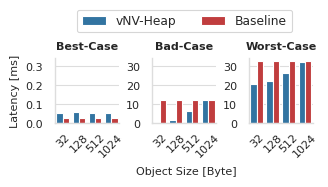

In [6]:
from util.plot import set_theme, plot_colors, save_plot
from util.convert import scale_and_filter_data
import seaborn as sns
import matplotlib.pyplot as plt

palette = set_theme(colors=2)
palette = [palette[1], palette[0]]
sns.set_palette(palette=palette)

unit = "ms"
filtered = scale_and_filter_data(dataset, unit, plotted_object_sizes)


g = sns.catplot(
    data=filtered,
    kind="bar",
    x="options.object_size", y="mean", hue="dataset_type", col="benchmark_title",
    col_wrap=4,
    errorbar="sd", alpha=1, aspect=(1/1.6)*(3.3/3) - (1/3) * 0.05, height=1.6, width=0.8,
    sharey=False
)
g.set_titles("{col_name}")
g.set(xlabel=None, ylabel='Latency [ms]')
g.tight_layout(pad=0)
g.legend.set_title("\nMeasurement")
#plt.yscale('log')

# def format_float(value, pos):
#     if value == int(value) and value != 1:
#         return str(int(value))
#     else:
#         return str(value)

for ax in g.axes:
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, y=0.05, ha="center")
    ax.set_title(ax.get_title(), rotation = 0, fontweight="bold")
    #ax.yaxis.set_major_formatter(FuncFormatter(format_float))

g.axes[1].set_ylabel("")
g.axes[2].set_ylabel("")
g.axes[0].set_ylim(top=(filtered["mean"].max() * 1.05)/100)

g.axes[1].sharey(g.axes[2])

g.axes[0].set_yticks([0,0.1,0.2,0.3])
g.axes[1].set_yticks([0,10,20,30])

#axins = zoomed_inset_axes(g.axes[0], 2, loc=1) # zoom = 6
g.figure.supxlabel("Object Size [Byte]", x=0.352, y=0.08, fontsize=8)
g.tight_layout(w_pad=0, h_pad=0)
catplot_handles = g.legend.set(visible=False)

plt.legend(
    loc = "lower center",
    bbox_to_anchor=(-1, 1.3),
    ncol=2,
    title=None,
    frameon=True
)

save_plot("accessing_data", False)